# Feedforward Neural Network with PyTorch on [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) dataset
By [Zahra Taheri](https://github.com/zahta), October 12, 2020

### Preperation for Google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#unzip dataset files from google drive to content folder in colab

import os

if os.path.exists("/content/cifar-100-python/")==False:
    print("unzip files!")
    !unzip -q "/content/drive/My Drive/cifar-100.zip"

### Import libraries

In [3]:
import numpy as np

import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import os

np.random.seed(100)

## Loading CIFAR-100

In [4]:
def get_proper_images(raw):
    raw_float = np.array(raw, dtype=float) 
    images = raw_float.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    return images.astype(int)

#def onehot_labels(labels):
#    return np.eye(100)[labels]

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
train_data=get_proper_images(unpickle('cifar-100-python/train')[b'data'])
#train_labels=onehot_labels(unpickle('cifar-100-python/train')[b'fine_labels'])
train_labels=unpickle('cifar-100-python/train')[b'fine_labels']
test_data=get_proper_images(unpickle('cifar-100-python/test')[b'data'])
#test_labels=onehot_labels(unpickle('cifar-100-python/test')[b'fine_labels'])
test_labels=unpickle('cifar-100-python/test')[b'fine_labels']

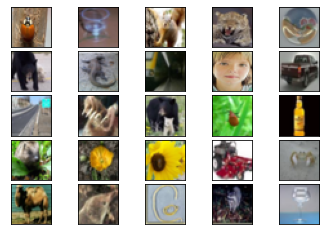

In [6]:
# display some random training images in a grid
num_plot = 5
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].imshow(train_data[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

## Preparation of the dataset

In [7]:
#some_digit = train_data[0]
#some_digit_image = some_digit
#plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
#plt.axis("off")
#plt.show()

In [8]:
#nsamples, a,b,c = train_data.shape
#print(train_data.shape)
#X_train= train_data.reshape((nsamples,a*b*c))
#nsamples2, a2,b2,c2 = test_data.shape
#X_test= test_data.reshape((nsamples2,a2*b2*c2))


#from sklearn import preprocessing

#scale = preprocessing.MinMaxScaler()
#X_train = scale.fit_transform(X_train)
#X_test = scale.fit_transform(X_test)
#print(X_train.shape)

#train_data= X_train.reshape((nsamples, a,b,c))
#test_data= X_test.reshape((nsamples2, a2,b2,c2))
#print(train_data.shape)

In [9]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(train_data) # transform to torch tensor
tensor_y = torch.Tensor(train_labels)
tensor_y = tensor_y.type(torch.LongTensor)

train_dataset = TensorDataset(tensor_x,tensor_y) # create your dataset

In [10]:
tensor_x2 = torch.Tensor(test_data) # transform to torch tensor
tensor_y2 = torch.Tensor(test_labels)
tensor_y2 = tensor_y2.type(torch.LongTensor)

test_dataset = TensorDataset(tensor_x2,tensor_y2) # create your datset

In [11]:
tensor_y

tensor([19, 29,  0,  ...,  3,  7, 73])

## Building Feedforward Neural Networks with PyTorch

In [12]:
# import libraries
import torch
import torch.nn as nn

from torch.autograd import Variable
from torchsummary import summary

### Model A: 3 Hidden Layers Feedforward Neural Network

#### Make dataset iterable

In [13]:
batch_size = 128
n_iters = 15000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

38


In [14]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [15]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.ReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.ReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        #linear function 4 (readout)
        out = self.fc4(out)
        return out       
    

In [16]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 100
hidden_dim1 = 1700
hidden_dim2 = 1500
hidden_dim3 = 512 

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [17]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1700]       5,224,100
              ReLU-2              [-1, 1, 1700]               0
            Linear-3              [-1, 1, 1500]       2,551,500
              ReLU-4              [-1, 1, 1500]               0
            Linear-5               [-1, 1, 512]         768,512
              ReLU-6               [-1, 1, 512]               0
            Linear-7               [-1, 1, 100]          51,300
Total params: 8,595,412
Trainable params: 8,595,412
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 32.79
Estimated Total Size (MB): 32.86
----------------------------------------------------------------


In [18]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [19]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw accuracy curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 3.9202022552490234. Accuracy: 11
Iteration: 1000. Loss: 3.872818946838379. Accuracy: 14
Iteration: 1500. Loss: 3.533858060836792. Accuracy: 16
Iteration: 2000. Loss: 3.2477211952209473. Accuracy: 17
Iteration: 2500. Loss: 3.356858491897583. Accuracy: 18
Iteration: 3000. Loss: 3.3305084705352783. Accuracy: 20
Iteration: 3500. Loss: 3.253417730331421. Accuracy: 20
Iteration: 4000. Loss: 2.974992513656616. Accuracy: 21
Iteration: 4500. Loss: 2.973419666290283. Accuracy: 22
Iteration: 5000. Loss: 2.720092535018921. Accuracy: 21
Iteration: 5500. Loss: 2.7789852619171143. Accuracy: 22
Iteration: 6000. Loss: 2.468723773956299. Accuracy: 22
Iteration: 6500. Loss: 2.8601460456848145. Accuracy: 22
Iteration: 7000. Loss: 2.5811538696289062. Accuracy: 22
Iteration: 7500. Loss: 2.368262767791748. Accuracy: 23
Iteration: 8000. Loss: 2.045410394668579. Accuracy: 24
Iteration: 8500. Loss: 2.6640267372131348. Accuracy: 23
Iteration: 9000. Loss: 2.0802347660064697. Accuracy: 23
Ite

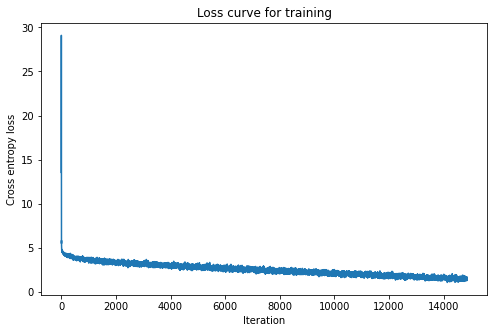

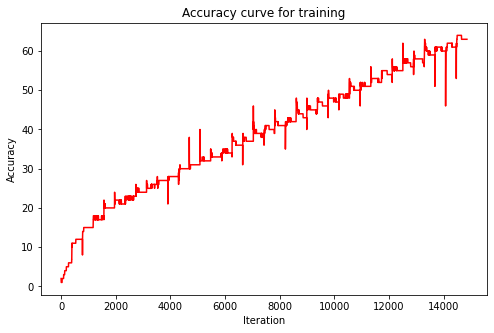

In [20]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [21]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_A.pkl')# only save parameters

### Model B: 7 Hidden Layers Feedforward Neural Network

#### Make dataset iterable

In [22]:
batch_size = 128
n_iters = 30000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

76


In [23]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False) # create your dataloader

### Create model class

In [24]:
class FeedforwardNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3,hidden_size4,hidden_size5,hidden_size6,hidden_size7, num_classes):
        super(FeedforwardNeuralNetworkModel, self).__init__()
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        # non-linearity 1
        self.relu1 = nn.ReLU()
        
        # linear function 2
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        # non-linearity 2
        self.relu2 = nn.ReLU()
        
        # linear function 3
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        # non-linearity 3
        self.relu3 = nn.ReLU()
        
        # linear function 4
        self.fc4 = nn.Linear(hidden_dim3, hidden_dim4)
        # non-linearity 4
        self.relu4 = nn.ReLU()
        
        # linear function 5
        self.fc5 = nn.Linear(hidden_dim4, hidden_dim5)
        # non-linearity 5
        self.relu5 = nn.ReLU()

        # linear function 6
        self.fc6 = nn.Linear(hidden_dim5, hidden_dim6)
        # non-linearity 6
        self.relu6 = nn.ReLU()
        
        # linear function 7
        self.fc7 = nn.Linear(hidden_dim6, hidden_dim7)
        # non-linearity 7
        self.relu7 = nn.ReLU()
        
        # linear function 8 (readout)
        self.fc8 = nn.Linear(hidden_dim7, output_dim)
        
    def forward(self, x):
        # linear function 1
        out = self.fc1(x)
        # non-linearity 1
        out = self.relu1(out)
        
        # linear function 2
        out = self.fc2(out)
        # non-linearity 2
        out = self.relu2(out)
        
        # linear function 3
        out = self.fc3(out)
        # non-linearity 3
        out = self.relu3(out)
        
        # linear function 4
        out = self.fc4(out)
        # non-linearity 4
        out = self.relu4(out)
        
        # linear function 5
        out = self.fc5(out)
        # non-linearity 5
        out = self.relu5(out)

        # linear function 6
        out = self.fc6(out)
        # non-linearity 6
        out = self.relu6(out)
        
        # linear function 7
        out = self.fc7(out)
        # non-linearity 7
        out = self.relu7(out)
        
        #linear function 8 (readout)
        out = self.fc8(out)
        return out       
    

In [25]:
#  Instantiate model class
input_dim = 3*32*32
output_dim = 100
hidden_dim1 = 1700
hidden_dim2 = 1500
hidden_dim3 = 1024
hidden_dim4 = 512
hidden_dim5 = 200
hidden_dim6 = 200
hidden_dim7 = 200

model = FeedforwardNeuralNetworkModel(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, hidden_dim6, hidden_dim7, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()
    

In [26]:
summary(model, (1,3*32*32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1700]       5,224,100
              ReLU-2              [-1, 1, 1700]               0
            Linear-3              [-1, 1, 1500]       2,551,500
              ReLU-4              [-1, 1, 1500]               0
            Linear-5              [-1, 1, 1024]       1,537,024
              ReLU-6              [-1, 1, 1024]               0
            Linear-7               [-1, 1, 512]         524,800
              ReLU-8               [-1, 1, 512]               0
            Linear-9               [-1, 1, 200]         102,600
             ReLU-10               [-1, 1, 200]               0
           Linear-11               [-1, 1, 200]          40,200
             ReLU-12               [-1, 1, 200]               0
           Linear-13               [-1, 1, 200]          40,200
             ReLU-14               [-1,

In [27]:
#  Instantiate loss class
criterion=nn.CrossEntropyLoss()

#  Instantiate optimizer class
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
# Train the model

train_loss = []
train_accuracy = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    # Calculate Accuracy         
    correct_1 = 0
    total_1 = 0
    for i, (images, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            images = Variable(images.view(-1, 3*32*32).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, 3*32*32))
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        '''
        Save accuracy to draw accuracy curve
        '''
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
                
        # Total number of labels
        total_1 += labels.size(0)
           
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        # Total correct predictions
        if torch.cuda.is_available():
                    correct_1 += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
        else:                
                    correct_1 += (predicted == labels).sum()
            
        accuracy = 100 * correct_1 // total_1
        train_accuracy.append(accuracy)
        ''''''
        
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        
        '''
        Save loss to draw accuracy curve
        '''
        train_loss.append(loss)
        ''''''
        
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, 3*32*32).cuda())
                else:
                    images = Variable(images.view(-1, 3*32*32))    
                    
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
           
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() # because .sum() function does not work on GPU
                else:                
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data, accuracy))
            

Iteration: 500. Loss: 4.0736494064331055. Accuracy: 6
Iteration: 1000. Loss: 3.869107246398926. Accuracy: 12
Iteration: 1500. Loss: 3.7139105796813965. Accuracy: 15
Iteration: 2000. Loss: 3.409076690673828. Accuracy: 16
Iteration: 2500. Loss: 3.436354160308838. Accuracy: 17
Iteration: 3000. Loss: 3.345980405807495. Accuracy: 18
Iteration: 3500. Loss: 2.9748799800872803. Accuracy: 19
Iteration: 4000. Loss: 3.3404080867767334. Accuracy: 20
Iteration: 4500. Loss: 3.2488765716552734. Accuracy: 21
Iteration: 5000. Loss: 3.3089759349823. Accuracy: 20
Iteration: 5500. Loss: 2.9266951084136963. Accuracy: 21
Iteration: 6000. Loss: 3.1038291454315186. Accuracy: 22
Iteration: 6500. Loss: 2.897690534591675. Accuracy: 23
Iteration: 7000. Loss: 2.427633047103882. Accuracy: 23
Iteration: 7500. Loss: 2.736093521118164. Accuracy: 23
Iteration: 8000. Loss: 2.8391785621643066. Accuracy: 25
Iteration: 8500. Loss: 2.371760129928589. Accuracy: 24
Iteration: 9000. Loss: 2.5327460765838623. Accuracy: 24
Itera

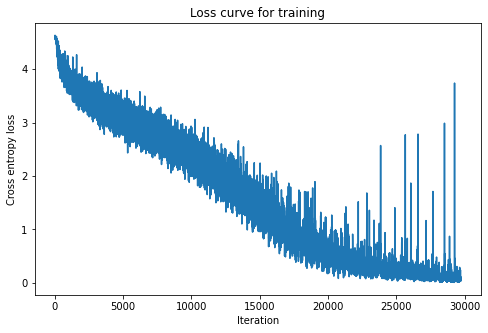

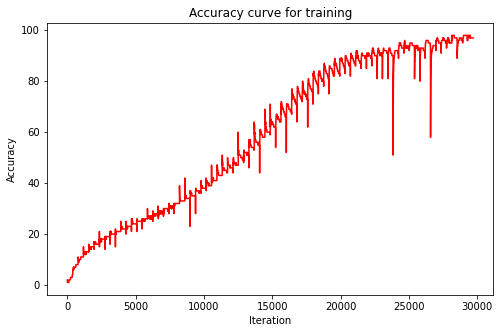

In [29]:
#Plots the loss and accuracy curves

plt.figure(figsize=(8,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("Cross entropy loss")
plt.title("Loss curve for training")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(len(train_accuracy)), train_accuracy, c='r')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy curve for training")
plt.show()

In [30]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network_pytorch_B.pkl')# only save parameters